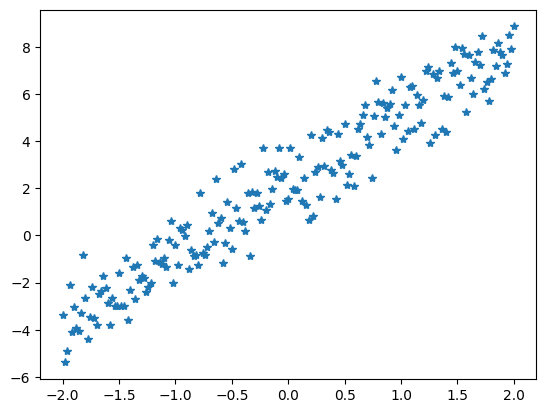

In [25]:
# Aprendendo a tratar dados
import tensorflow as tf
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

noise = tf.random.normal(shape=[NUM_EXAMPLES])

y = f(x) + noise

plt.plot(x, y, '*')
plt.show()

In [45]:
import tensorflow as tf

def parse_object_to_tensor(obj):
    tensor = []
    for key in obj:
        if type(obj[key]) is dict:
            for dpth_key in obj[key]:
                tensor.append(tf.data.TextLineDataset(obj[key][dpth_key]))
        else:
            tensor.append(tf.data.TextLineDataset(obj[key]))
    return tensor

obj = {"a": "12", "b": {"nm": "13"}, "c": "ajsodjsa"}

a = tf.data.experimental.SqlDataset('bigQuery', 'an', "SELECT * FROM ALL")

print(a)

<_TensorDataset element_spec=DatasetSpec(TensorSpec(shape=(), dtype=tf.string, name=None), TensorShape([3]))>


In [1]:
# Obtendo dados do BiqQuery
from google.cloud import bigquery
import json
import pandas as pd

client = bigquery.Client()

query_job = client.query(
    """
    SELECT * FROM `growyxprod.firebase_projects.post_schema_projectPositions_latest` LIMIT 150
    """
)

result = query_job.result()

tensor = []

for row in result:
    tensor.append(json.loads(row.positions_member))

# print(tensor)

df = pd.json_normalize(tensor)

df['jobTitle'] = df['jobTitle'].fillna(0)
df['skills'] = df['skills'].fillna('[]')
df['skills'] = ','.join(df['skills'][0])
df['softwares'] = ','.join(df['softwares'][0])
df['codeLanguage'] = ','.join(df['codeLanguage'][0])
# df.drop(df[(df['jobTitle'] == 0)].index, inplace=True)
# print(df.head())
candidate = df.pop('database')

df.head()


,codeLanguage,softwares,jobTitle,skills
0,React,,0,"[,]"
1,React,,Project manager,"[,]"
2,React,,UX Designer,"[,]"
3,React,,Developer front-end,"[,]"
4,React,,Developer back-end,"[,]"


In [2]:

selecteds_query_job = client.query(
    """
    SELECT quizPersonality_profile_personal, quizSoftSkills_profile_trustiness,
     quizSoftSkills_profile_innovation, quizSoftSkills_profile_purpose,
     quizSoftSkills_profile_mentalSecurity, quizSoftSkills_profile_totalPoints,
     quizSoftSkills_profile_teamWork, quizSoftSkills_profile_level,
       wages_currency, wages_hourGrossValue,
       experience_jobTitle, experience_level, experience_workAvailability,
        quizCulture_profile_adhocracia, quizCulture_profile_cla,
         quizCulture_profile_hierarchy, quizCulture_profile_market,
          quizPersonality_profile_calm, quizPersonality_profile_selfEsteem, 
           quizPersonality_profile_trustworthy, quizPersonality_profile_conformity,
            quizPersonality_profile_discerening, quizPersonality_profile_careful,
             quizPersonality_profile_dominance, quizPersonality_profile_enthusiastic,
              quizPersonality_profile_spontaneous, quizPersonality_profile_stability,
               quizPersonality_profile_influence, quizPersonality_profile_influencer,
                quizPersonality_profile_selfish, quizPersonality_profile_objective,
                 quizPersonality_profile_organized, quizPersonality_profile_optimist,
                  quizPersonality_profile_listener, quizPersonality_profile_patient,
                   quizPersonality_profile_persuasive, quizPersonality_profile_planner,
                    quizPersonality_profile_precision, quizPersonality_profile_radical,
                     quizPersonality_profile_visionary,  FROM `growyxprod.firestore_export.posts_schema_bqUsers_latest` LIMIT 150
    """
)

selectedes = selecteds_query_job.to_arrow().to_pandas()

dt = selectedes
# dt.drop(['document_name', 'document_id', 'timestamp', 'operation', 'login_providerId'], axis='columns', inplace=True)
ks = pd.DataFrame(dt)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_currency,wages_hourGrossValue,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,14.000000000,14.000000000,15.000000000,15.000000000,75.000000000,17.000000000,None,BRL,80,...,100.000000000,80.000000000,100.000000000,100.000000000,100.000000000,80.000000000,80.000000000,60.000000000,80.000000000,100.000000000
1,None,16.000000000,16.000000000,18.000000000,13.000000000,80.000000000,17.000000000,None,BRL,76,...,60.000000000,100.000000000,100.000000000,100.000000000,100.000000000,80.000000000,80.000000000,40.000000000,100.000000000,100.000000000
2,None,16.000000000,14.000000000,17.000000000,14.000000000,79.000000000,18.000000000,None,None,None,...,80.000000000,100.000000000,60.000000000,60.000000000,100.000000000,80.000000000,100.000000000,20.000000000,80.000000000,100.000000000
3,None,16.000000000,11.000000000,15.000000000,15.000000000,69.000000000,12.000000000,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [3]:
strData = ks[['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability']].copy()
ks = ks.drop(['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability'], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,14.000000000,14.000000000,15.000000000,15.000000000,75.000000000,17.000000000,None,80,2.000000000,...,100.000000000,80.000000000,100.000000000,100.000000000,100.000000000,80.000000000,80.000000000,60.000000000,80.000000000,100.000000000
1,None,16.000000000,16.000000000,18.000000000,13.000000000,80.000000000,17.000000000,None,76,1.000000000,...,60.000000000,100.000000000,100.000000000,100.000000000,100.000000000,80.000000000,80.000000000,40.000000000,100.000000000,100.000000000
2,None,16.000000000,14.000000000,17.000000000,14.000000000,79.000000000,18.000000000,None,None,3.000000000,...,80.000000000,100.000000000,60.000000000,60.000000000,100.000000000,80.000000000,100.000000000,20.000000000,80.000000000,100.000000000
3,None,16.000000000,11.000000000,15.000000000,15.000000000,69.000000000,12.000000000,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [4]:
# strData.replace("", "ND", inplace=True)
strData.fillna("ND", inplace=True)
# print(strData['experience_jobTitle'][2])
strData.head()

,wages_currency,experience_jobTitle,experience_level,experience_workAvailability
0,BRL,,Sênior,Hora
1,BRL,,Sênior,Hora
2,ND,business intelligence analyst,júnior,part-time
3,ND,ND,,ND
4,ND,developer front-end,Júnior,Full-time


In [5]:
exp = pd.get_dummies(strData, dtype=int)
exp.head()

,wages_currency_BRL,wages_currency_EUR,wages_currency_ND,wages_currency_USD,experience_jobTitle_,experience_jobTitle_ND,experience_jobTitle_account executive,experience_jobTitle_analista de suporte- sap basis,experience_jobTitle_business intelligence analyst,experience_jobTitle_copywriter,...,experience_level_júnior,experience_level_pleno,experience_level_sênior,experience_workAvailability_Full-time,experience_workAvailability_Hora,experience_workAvailability_ND,experience_workAvailability_Part-time,experience_workAvailability_full-time,experience_workAvailability_hora,experience_workAvailability_part-time
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [9]:
ks.fillna(0, inplace=True)
ks = ks.apply(pd.to_numeric, errors='coerce', downcast="integer")
ks = pd.concat([ks, exp], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,experience_level_júnior,experience_level_pleno,experience_level_sênior,experience_workAvailability_Full-time,experience_workAvailability_Hora,experience_workAvailability_ND,experience_workAvailability_Part-time,experience_workAvailability_full-time,experience_workAvailability_hora,experience_workAvailability_part-time
0,0,14,14,15,15,75,17,0,80.0,2,...,0,0,0,0,1,0,0,0,0,0
1,0,16,16,18,13,80,17,0,76.0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,16,14,17,14,79,18,0,0.0,3,...,1,0,0,0,0,0,0,0,0,1
3,0,16,11,15,15,69,12,0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
categ = pd.get_dummies(df, dtype=int)
categ.head()

,codeLanguage_React,softwares_,jobTitle_0,jobTitle_Agile coach,jobTitle_Data engineer,jobTitle_DevOps engineer,jobTitle_Developer back-end,jobTitle_Developer front-end,jobTitle_Developer full-stack,jobTitle_Developer mobile,jobTitle_Product owner,jobTitle_Project manager,jobTitle_Quality Assurance Engineer,jobTitle_Software engineer,jobTitle_UX / UI Designer,jobTitle_UX Designer,"skills_[,]"
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [111]:
import tensorflow as tf

# ts = ks.values.flatten()

dataset = tf.data.Dataset.from_tensor_slices((categ, ks), name="vaga")

print(dataset)

for vaga, candidato in dataset.take(20):
    print('Vaga: {}, Candidato: {}'.format(vaga.shape, candidato.shape))


<_TensorSliceDataset element_spec=(TensorSpec(shape=(17,), dtype=tf.int32, name=None), TensorSpec(shape=(124,), dtype=tf.float64, name=None))>
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)
Vaga: (17,), Candidato: (124,)


(150, 17)
(150, 17) (150, 124)
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_42 (Normaliz  (150, 17)                 35        
 ation)                                                          
                                                                 
 dense_442 (Dense)           (150, 17)                 306       
                                                                 
 dense_443 (Dense)           (150, 52)                 936       
                                                                 
 dense_444 (Dense)           (150, 68)                 3604      
                                                                 
 dense_445 (Dense)           (150, 76)                 5244      
                                                                 
 dense_446 (Dense)           (150, 87)                 6699      
                      

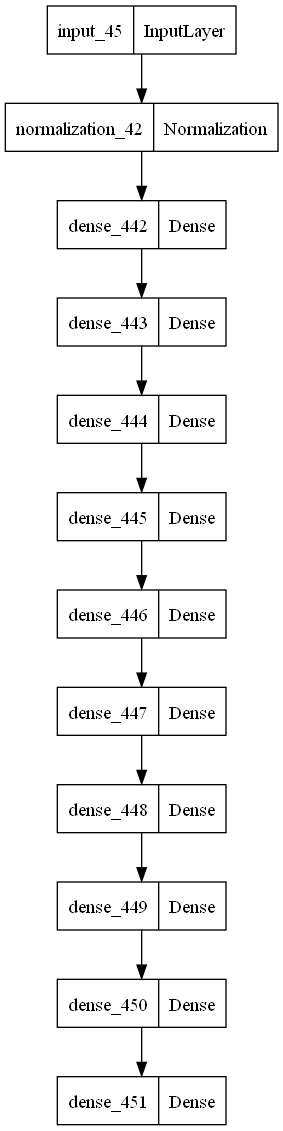

In [114]:
from tensorflow import keras

model2 = keras.models.Sequential()
model2.add(keras.Input(shape=(17), batch_size=150))
print(model2.input_shape)
# model2.add(keras.layers.Permute((2,1), input_shape=(17,)))
model2.add(keras.layers.Normalization(axis=-1))
model2.add(keras.layers.Dense(17, activation="relu"))
model2.add(keras.layers.Dense(52, activation="relu"))
model2.add(keras.layers.Dense(68, activation="relu"))
model2.add(keras.layers.Dense(76, activation="relu"))
model2.add(keras.layers.Dense(87, activation="relu"))
model2.add(keras.layers.Dense(92, activation="relu"))
model2.add(keras.layers.Dense(100, activation="relu"))
# model2.add(keras.layers.Embedding(100, 124))
model2.add(keras.layers.Dense(124, activation="relu"))
model2.add(keras.layers.Dense(124, activation="softmax"))
# model2.add(keras.layers.Reshape(target_shape=(1,76)))
# model2.add(keras.layers.Permute((2,1), input_shape=(76,1)))
# model2.add(keras.layers.Flatten())
# model2.add(keras.layers.Resizing(76,1))
model2.add(keras.layers.Dense(124))
# model2.add(keras.layers.Reshape(target_shape=(124,1)))
# model2.add(keras.layers.Permute((2,1), input_shape=(1,124)))
# model2.add(keras.layers.Flatten())
print(model2.input_shape, model2.output_shape)

model2.compile(
      optimizer=keras.optimizers.Adam(1e-2),
      loss=[keras.losses.BinaryCrossentropy(), keras.losses.CategoricalHinge()],
      metrics=[keras.metrics.BinaryCrossentropy(), keras.metrics.CategoricalHinge()]
)

model2.summary()

keras.utils.plot_model(model2, "first_model.png")

In [115]:
# dtst = keras.utils.to_categorical(dataset.choose_from_datasets(dataset, [0]), dtype="float32")
history = model2.fit(dataset, epochs=10, validation_data=dataset)

Epoch 1/10


150/150 [==============================] - 6s 12ms/step - loss: 17.9427 - binary_crossentropy: 17.9427 - categorical_hinge: 1.5381 - val_loss: -9.8269 - val_binary_crossentropy: -9.8269 - val_categorical_hinge: 1.9421
Epoch 2/10
150/150 [==============================] - 2s 11ms/step - loss: -24.8506 - binary_crossentropy: -24.8506 - categorical_hinge: 1.9598 - val_loss: -34.5451 - val_binary_crossentropy: -34.5451 - val_categorical_hinge: 1.9611
Epoch 3/10
150/150 [==============================] - 1s 10ms/step - loss: -35.9366 - binary_crossentropy: -35.9366 - categorical_hinge: 1.9611 - val_loss: -37.4745 - val_binary_crossentropy: -37.4745 - val_categorical_hinge: 1.9611
Epoch 4/10
150/150 [==============================] - 1s 8ms/step - loss: -38.8661 - binary_crossentropy: -38.8661 - categorical_hinge: 1.9611 - val_loss: -39.5565 - val_binary_crossentropy: -39.5565 - val_categorical_hinge: 1.9611
Epoch 5/10
150/150 [==============================] - 2s 10ms/step - loss: -39.5732 

{'loss': [17.942733764648438, -24.850635528564453, -35.93663787841797, -38.866085052490234, -39.57316970825195, -39.625511169433594, -40.36765670776367, -40.6411018371582, -40.642799377441406, -40.644630432128906], 'binary_crossentropy': [17.942733764648438, -24.850635528564453, -35.93663787841797, -38.866085052490234, -39.57316970825195, -39.625511169433594, -40.36765670776367, -40.64109802246094, -40.642799377441406, -40.644630432128906], 'categorical_hinge': [1.5380654335021973, 1.959842324256897, 1.9610612392425537, 1.9610612392425537, 1.9610612392425537, 1.9610612392425537, 1.9610612392425537, 1.9610612392425537, 1.9610612392425537, 1.9610612392425537], 'val_loss': [-9.82687759399414, -34.545127868652344, -37.47446823120117, -39.55650329589844, -39.594844818115234, -39.68134689331055, -40.64035415649414, -40.6419563293457, -40.64374542236328, -40.645633697509766], 'val_binary_crossentropy': [-9.82687759399414, -34.545127868652344, -37.47446823120117, -39.55650329589844, -39.594844

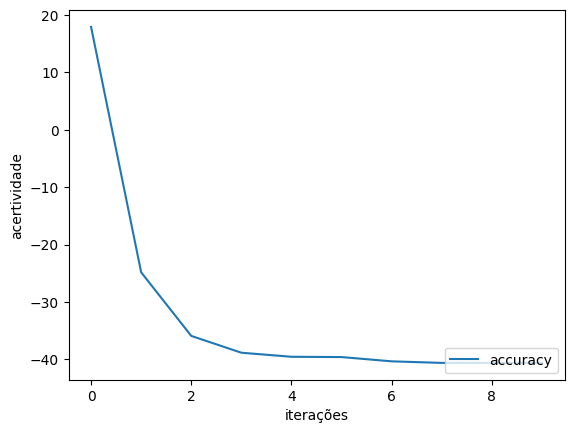

In [116]:
print(history.history)
plt.plot(history.history['loss'], label='accuracy')
# plt.plot(history.history['logcosh'], label= 'logcosh')
plt.xlabel('iterações')
plt.ylabel('acertividade')
# plt.ylim([0.1,0.7])
plt.legend(loc='lower right')

test_loss, test_acc, *outros = model2.evaluate(dataset, verbose=2)

In [117]:
global vaguinha
for vaga, candidato in dataset.take(1):
    vaguinha = vaga
prediction = model2.predict(vaguinha)

1/1 [==============================] - 0s 284ms/step


In [131]:
prediction.T

array([[ 1.2450484 ],
       [ 1.0843    ],
       [ 1.1771518 ],
       [ 1.1478664 ],
       [ 1.226297  ],
       [ 1.2690858 ],
       [ 1.198611  ],
       [ 1.2370895 ],
       [ 1.1654404 ],
       [-0.08107715],
       [ 1.2675831 ],
       [ 1.0565643 ],
       [-0.03925987],
       [ 1.1309118 ],
       [ 1.0381002 ],
       [ 1.2999471 ],
       [ 1.256223  ],
       [ 1.2179778 ],
       [ 1.2235153 ],
       [ 1.102341  ],
       [-0.03732626],
       [-0.15236208],
       [ 1.13708   ],
       [-0.00996277],
       [ 1.0770078 ],
       [ 1.1953276 ],
       [ 1.2095163 ],
       [-0.08320178],
       [ 1.1871889 ],
       [ 1.238005  ],
       [ 1.2208315 ],
       [-0.1235273 ],
       [ 1.2953638 ],
       [ 1.1323159 ],
       [ 1.2034776 ],
       [-0.1448581 ],
       [ 1.1856912 ],
       [ 1.235209  ],
       [ 1.141264  ],
       [ 1.1601195 ],
       [-0.04177129],
       [ 1.2584301 ],
       [ 1.2612141 ],
       [-0.13158016],
       [ 1.0126623 ],
       [ 1